# Multiple Myeloam Detection Using Deep Learning

---



Dataset Link: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/XCX7ST

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import random
%matplotlib inline

In [ ]:
# Mounting Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading cancer images
path = '/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset'
canc = []
l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
for i in range(40):
    img_arr = cv2.imread((os.path.join(path,l[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    canc.append([new_arr,1])
canc[35]

[array([[[182, 154, 158],
         [185, 162, 158],
         [186, 171, 166],
         ...,
         [157, 147, 153],
         [158, 141, 153],
         [151, 135, 145]],
 
        [[184, 154, 147],
         [180, 159, 163],
         [187, 171, 169],
         ...,
         [158, 148, 159],
         [157, 143, 146],
         [150, 134, 150]],
 
        [[182, 150, 150],
         [182, 162, 161],
         [185, 172, 174],
         ...,
         [159, 143, 155],
         [158, 141, 150],
         [151, 131, 140]],
 
        ...,
 
        [[150, 129, 164],
         [150, 126, 147],
         [147, 114, 138],
         ...,
         [179, 156, 171],
         [180, 160, 171],
         [182, 154, 176]],
 
        [[154, 124, 146],
         [145, 116, 140],
         [145, 109, 135],
         ...,
         [181, 158, 176],
         [181, 155, 179],
         [184, 158, 176]],
 
        [[148, 115, 136],
         [144, 112, 135],
         [146, 112, 145],
         ...,
         [180, 157, 177],
  

In [ ]:
# Loading non-cancer images
nc_path = '/content/drive/My Drive/noncancer'
non_canc = []
la = os.listdir('/content/drive/My Drive/noncancer')
for i in range(40):
    img_arr = cv2.imread((os.path.join(nc_path,la[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    non_canc.append([new_arr,0])
non_canc[15]

[array([[[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        [[164,  69,  51],
         [164,  69,  51],
         [164,  69,  51],
         ...,
         [201, 196, 197],
         [201, 196, 197],
         [201, 196, 197]],
 
        ...,
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
         [206, 211, 210],
         [206, 211, 210]],
 
        [[210, 211, 211],
         [210, 211, 211],
         [210, 211, 211],
         ...,
         [206, 211, 210],
  

In [ ]:
# Combining cancer and non-cancer images and shuffling the dataset
l = canc + non_canc
random.shuffle(l)

In [ ]:
# Checking the length of the combined dataset
len(l)

80

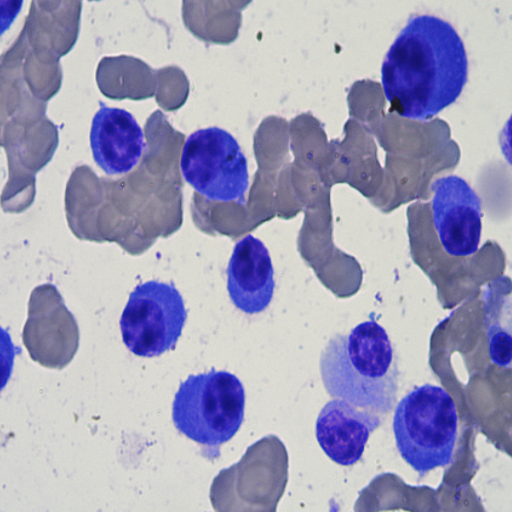

In [ ]:
# Displaying a sample image from the combined dataset
from google.colab.patches import cv2_imshow
cv2_imshow(l[0][0])

In [ ]:
# Preparing data for training
x = []
y = []
for img,label in l:
    x.append(img)
    y.append(label)

In [ ]:
x = np.array(x)

In [ ]:
len(x)

80

In [ ]:
len(y)

80

In [ ]:
# Converting labels to one-hot encoding
import tensorflow
y = tensorflow.keras.utils.to_categorical(y,num_classes=2)

In [ ]:
# Dispalying a sample of the labels
y[:10]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [ ]:
# Applying CLAHE (Contrast Limited Adaptive Histogram Equalization) to enhance image contrast
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
for i in x:
  i[:,:,0] = clahe.apply(i[:,:,0])
  i[:,:,1] = clahe.apply(i[:,:,1])
  i[:,:,2] = clahe.apply(i[:,:,2])

In [ ]:
# Defining function to create image masks
def mask(img):
  hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
  pink_lower = np.array([100, 100, 30])
  pink_upper = np.array([255, 250, 250])
  mask = cv2.inRange(hsv_img, pink_lower, pink_upper)
  return(mask)

In [ ]:
# Defining function to segment images
def seg(img):
  yield (cv2.bitwise_or(img, img, mask = mask(img)))

In [ ]:
# Segmenting the images
seg_list = []
for i in x:
  q = list(seg(i))
  seg_list.append(q[0])

In [ ]:
seg_list = np.array(seg_list)
seg_list = np.reshape((56,512,512,3))
seg_list.shape

(80, 512, 512, 3)

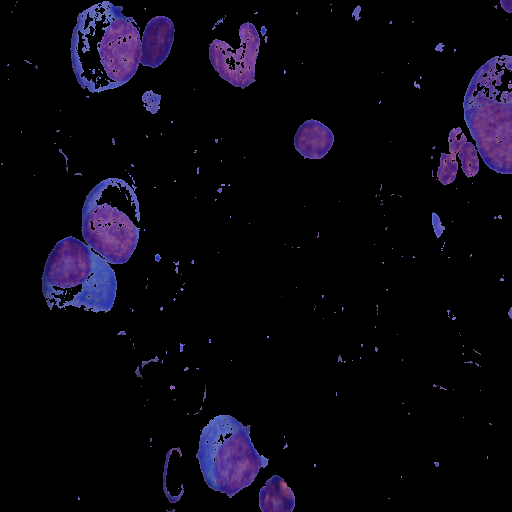

In [ ]:
# Displaying a segmented image
cv2_imshow(seg_list[1])

In [ ]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(seg_list,y,test_size = 0.30,random_state = 1)

In [ ]:
len(x_train)

56

In [ ]:
len(y_test)

24

In [ ]:
x_train.shape

(56, 512, 512, 3)

In [ ]:
x_test.shape

(24, 512, 512, 3)

In [ ]:
# Importing more libraries to build the CNN model
import tensorflow as tf
import os
from tensorflow import keras
from keras import Sequential
from keras.layers import (Conv2D,Flatten,Dense,Dropout,
BatchNormalization,ZeroPadding2D,MaxPooling2D,GlobalAveragePooling2D,Activation,LeakyReLU)
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [ ]:
# Defining the CNN architecture
model = Sequential()
model.add(Conv2D(96, (11, 11), input_shape = (512,512,3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(384, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(192, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(4096, kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, kernel_initializer='glorot_normal'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2, kernel_initializer='glorot_normal'))
model.add(Activation('softmax'))


In [ ]:
# Defining a learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                              patience=3,
                              factor = 0.3,
                             min_lr=0.0001)


In [ ]:
# Compiling the model with appropriate loss and optimizer
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
# Training the model and monitor training progress
history = model.fit(x_train, y_train, batch_size=5, epochs=100, validation_split=0.1,shuffle=True,callbacks=[reduce_lr])

Epoch 1/100
10/10 [==============================] - 3s 337ms/step - loss: 1.4064 - accuracy: 0.8600 - val_loss: 8.9879e-05 - val_accuracy: 1.0000
Epoch 2/100
10/10 [==============================] - 3s 342ms/step - loss: 3.1685e-06 - accuracy: 1.0000 - val_loss: 9.1587e-05 - val_accuracy: 1.0000
Epoch 3/100
10/10 [==============================] - 3s 344ms/step - loss: 2.8347e-06 - accuracy: 1.0000 - val_loss: 9.3712e-05 - val_accuracy: 1.0000
Epoch 4/100
10/10 [==============================] - 3s 349ms/step - loss: 1.2135e-06 - accuracy: 1.0000 - val_loss: 9.4625e-05 - val_accuracy: 1.0000
Epoch 5/100
10/10 [==============================] - 3s 347ms/step - loss: 1.4734e-06 - accuracy: 1.0000 - val_loss: 9.5638e-05 - val_accuracy: 1.0000
Epoch 6/100
10/10 [==============================] - 3s 343ms/step - loss: 1.7810e-06 - accuracy: 1.0000 - val_loss: 9.7246e-05 - val_accuracy: 1.0000
Epoch 7/100
10/10 [==============================] - 3s 337ms/step - loss: 1.9073e-06 - accuracy: 

In [ ]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

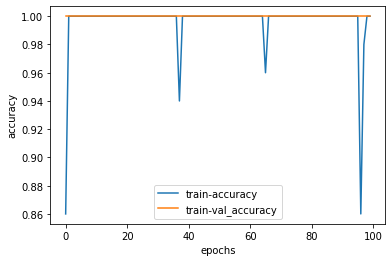

In [ ]:
# Visualizing training history (accuracy)
plt.plot(history.epoch,history.history['accuracy'],label = 'train-accuracy')
plt.plot(history.epoch,history.history['val_accuracy'],label = 'train-val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

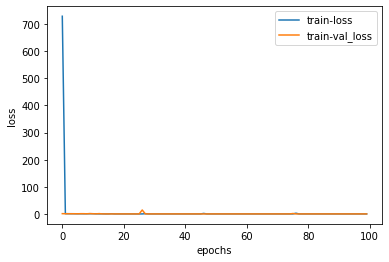

In [ ]:
# Visualizing training history (loss)
plt.plot(model.history.epoch,model.history.history['loss'],label = 'train-loss')
plt.plot(model.history.epoch,model.history.history['val_loss'],label = 'train-val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

Text(0, 0.5, 'learning-rate')

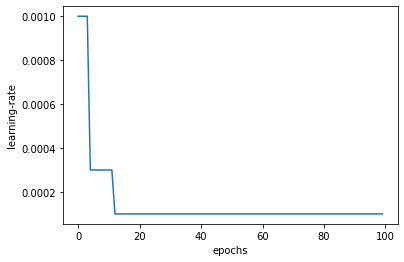

In [ ]:
# Visualizing training history (learning rate)
plt.plot(model.history.epoch,model.history.history['lr'],label = 'lr')
plt.xlabel('epochs')
plt.ylabel('learning-rate')

In [ ]:
# Evaluate the model on the training data
model.evaluate(x_train,y_train)

2/2 [==============================] - 3s 1s/step - loss: 9.9044e-06 - accuracy: 1.0000


[9.904409125738312e-06, 1.0]

In [ ]:
# Evaluate the model on the testing data
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 2ms/step - loss: 1.2914e-07 - accuracy: 1.0000


[1.2914324543089606e-07, 1.0]

In [ ]:
# Making predictions on the testing data
test_pred = model.predict(x_test)
test_pred[0]

array([1.0000000e+00, 2.6747696e-16], dtype=float32)

In [ ]:
# Converting model predictions to class labels
pred = []
for i in test_pred:
  pred.append(np.argmax(i))
pred[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1]

In [ ]:
pred = np.array(pred)

In [ ]:
y_test1 = []
for i in y_test:
  y_test1.append(np.argmax(i))

In [ ]:
y_test1[:10]

[0, 1, 0, 1, 0, 0, 0, 0, 0, 1]

In [ ]:
# Calculating the confusion matrix and classification report
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(pred,y_test1))
print(classification_report(pred,y_test1))

[[12  0]
 [ 0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



The table suggests that the model has achieved perfect classification performance for both classes, as indicated by precision, recall, and F1-score all being 1.00, and an accuracy of 100%

In [ ]:
# Loading and preprocessing a new set of test images
path = '/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset'
test_canc = []
l = os.listdir('/content/drive/My Drive/dataverse_files/MiMM_SBILab Dataset')
for i in range(41,66):
    img_arr = cv2.imread((os.path.join(path,l[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    test_canc.append([new_arr,1])
test_canc

[[array([[[184, 146, 147],
          [180, 134, 139],
          [178, 112, 120],
          ...,
          [209, 190, 193],
          [209, 192, 193],
          [208, 190, 195]],
  
         [[189, 155, 154],
          [185, 145, 152],
          [185, 130, 139],
          ...,
          [205, 188, 195],
          [211, 192, 192],
          [209, 192, 194]],
  
         [[188, 164, 164],
          [185, 152, 159],
          [184, 137, 145],
          ...,
          [208, 188, 191],
          [211, 193, 193],
          [209, 193, 195]],
  
         ...,
  
         [[136,  44,  92],
          [136,  50, 103],
          [136,  54, 110],
          ...,
          [155,  69, 124],
          [154,  66, 126],
          [155,  80, 137]],
  
         [[136,  50, 102],
          [134,  50, 106],
          [137,  61, 115],
          ...,
          [157,  70, 119],
          [156,  76, 137],
          [160,  89, 142]],
  
         [[141,  52, 100],
          [136,  57, 112],
          [138,  64, 123

In [ ]:
# Loading non-cancer images for testing
nc_path = '/content/drive/My Drive/noncancer'
test_non_canc = []
for i in range(41,66):
    img_arr = cv2.imread((os.path.join(nc_path,la[i])),-1)
    new_arr = cv2.resize(img_arr,(512,512))
    test_non_canc.append([new_arr,0])
test_non_canc

[[array([[[213, 217, 216],
          [214, 217, 215],
          [214, 218, 216],
          ...,
          [212, 217, 216],
          [212, 217, 215],
          [212, 216, 214]],
  
         [[214, 218, 216],
          [216, 218, 216],
          [214, 217, 215],
          ...,
          [210, 216, 214],
          [211, 216, 214],
          [212, 216, 213]],
  
         [[215, 218, 216],
          [216, 219, 217],
          [213, 218, 216],
          ...,
          [211, 217, 215],
          [213, 216, 214],
          [212, 215, 213]],
  
         ...,
  
         [[149, 124, 128],
          [152, 121, 125],
          [154, 121, 125],
          ...,
          [168, 165, 107],
          [163, 153,  93],
          [152, 135,  84]],
  
         [[149, 124, 128],
          [151, 122, 126],
          [151, 122, 125],
          ...,
          [157, 144,  87],
          [154, 133,  85],
          [142, 109,  84]],
  
         [[152, 125, 130],
          [151, 124, 128],
          [148, 120, 125

In [ ]:
# Combining test images and shuffling the dataset
l1 = test_canc + test_non_canc
random.shuffle(l1)
l1

[[array([[[188, 175, 173],
          [185, 176, 166],
          [188, 180, 170],
          ...,
          [196, 190, 190],
          [197, 190, 192],
          [197, 189, 189]],
  
         [[194, 182, 178],
          [191, 182, 175],
          [192, 186, 179],
          ...,
          [197, 189, 192],
          [195, 188, 188],
          [198, 189, 186]],
  
         [[192, 186, 180],
          [192, 186, 181],
          [190, 186, 180],
          ...,
          [193, 184, 192],
          [198, 189, 191],
          [198, 191, 191]],
  
         ...,
  
         [[138, 113, 128],
          [133, 115, 132],
          [133, 113, 135],
          ...,
          [188, 177, 172],
          [188, 176, 182],
          [187, 173, 183]],
  
         [[138, 116, 133],
          [134, 116, 135],
          [133, 116, 136],
          ...,
          [187, 177, 181],
          [188, 176, 186],
          [189, 177, 182]],
  
         [[133, 115, 134],
          [129, 115, 136],
          [128, 116, 136

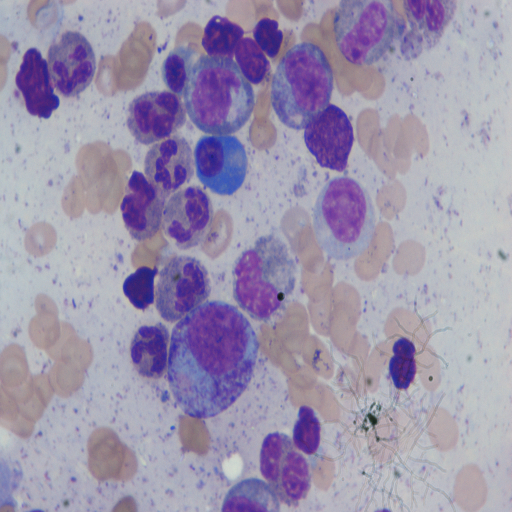

In [ ]:
# Displaying a sample test image
cv2_imshow(l1[0][0])

In [ ]:
# Preparing test data for evaluation
x = []
y = []
for img,label in l1:
    x.append(img)
    y.append(label)

In [ ]:
x = np.array(x)
x

array([[[[188, 175, 173],
         [185, 176, 166],
         [188, 180, 170],
         ...,
         [196, 190, 190],
         [197, 190, 192],
         [197, 189, 189]],

        [[194, 182, 178],
         [191, 182, 175],
         [192, 186, 179],
         ...,
         [197, 189, 192],
         [195, 188, 188],
         [198, 189, 186]],

        [[192, 186, 180],
         [192, 186, 181],
         [190, 186, 180],
         ...,
         [193, 184, 192],
         [198, 189, 191],
         [198, 191, 191]],

        ...,

        [[138, 113, 128],
         [133, 115, 132],
         [133, 113, 135],
         ...,
         [188, 177, 172],
         [188, 176, 182],
         [187, 173, 183]],

        [[138, 116, 133],
         [134, 116, 135],
         [133, 116, 136],
         ...,
         [187, 177, 181],
         [188, 176, 186],
         [189, 177, 182]],

        [[133, 115, 134],
         [129, 115, 136],
         [128, 116, 136],
         ...,
         [193, 178, 183],
        

In [ ]:
x.shape

(50, 512, 512, 3)

In [ ]:
# Preprocessing and segmenting test images
x1 = []
for i in x:
  q = list(seg(i))
  x1.append(q[0])

y = np.array(y)
y_temp = np.copy(y)

In [ ]:
# Converting test labels to one-hot encoding
y = tensorflow.keras.utils.to_categorical(y,num_classes=2)

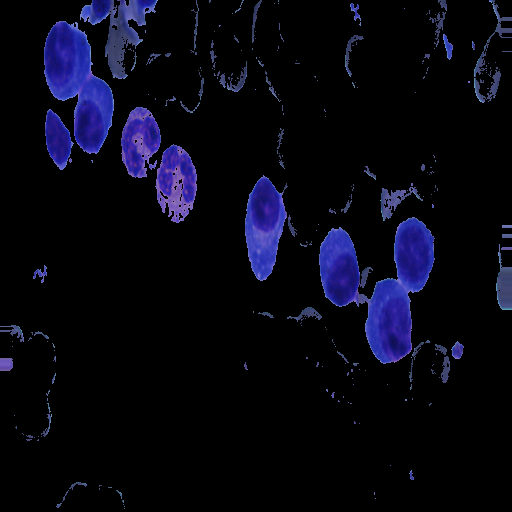

In [ ]:
# Displaying a segmented test image
cv2_imshow(x1[1])

In [ ]:
len(x1)

50

In [ ]:
x1 = np.array(x1)
x1.shape

(50, 512, 512, 3)

In [ ]:
y[:3]

array([[0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
# Evaluating the model on the test data
model.evaluate(x1,y)

2/2 [==============================] - 2s 1s/step - loss: 2.1554e-04 - accuracy: 1.0000


[0.0002155359834432602, 1.0]

In [ ]:
# Making predictions on the test data
p1 = model.predict(x1)
p1[0]

array([5.9452465e-09, 1.0000000e+00], dtype=float32)

In [ ]:
# Converting model predictions for test data to class labels
p = []
for i in p1:
  p.append(np.argmax(i))

In [ ]:
p = np.array(p)

In [ ]:
# Calculating the confusion matrix and classification report for test data
print(confusion_matrix(p,y_temp))
print(classification_report(p,y_temp))

[[25  0]
 [ 0 25]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [ ]:
# Displaying the first 10 true labels from the test data
y_temp[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
# Displaying the first 10 predicted labels for the test data
p[:10]

array([1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

The model has achieved a 100% accuracy in predicting labels for the test data.